In [1]:
from math import cos,sin
import matplotlib.pyplot as plt
import numpy as np
from scipy import special as spl
import scipy.integrate as spli
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D #libreria para graficar en 3D
%matplotlib inline 

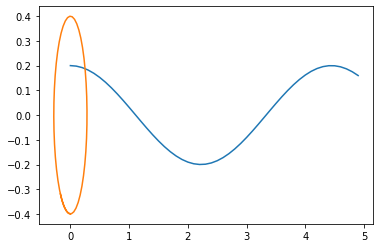

In [2]:
"""omega=raiz(k/m)   k es la contante de elasticidad de 0.1 n/m y m es la masa igual a 5 g
t=0 aumentara 0,1 durante 5 segundos

oscilador armonico
"""

A=0.2 
t0=0.0
tf=5.0
dt=0.1
omega=1.414
tiempo=[]
posicion=[]
velocidad=[]
aceleracion=[]

len_t=int((tf-t0)/dt) #por los parametros esto es 50

for i in range (len_t):
    posicion.append(A*cos(omega*i*dt)) #i*dt maximo sera 5
    tiempo.append(i*dt)
    velocidad.append((-1.0)*omega*A*sin(omega*i*dt))
    aceleracion.append((-1.0)*(omega**2)*A*cos(omega*i*dt))
    
#graficacion 
plt.plot(tiempo,posicion,velocidad,aceleracion)
plt.show()

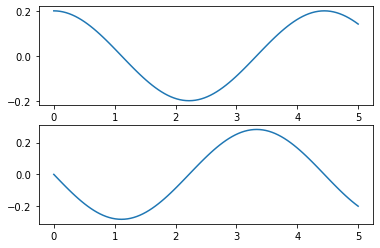

In [3]:
A=0.2 
t0=0.0
tf=5.0
dt=0.1
omega=1.414

tiempo=np.linspace(t0,tf,100)
posicion=A*np.cos(omega*tiempo)
velocidad=-A*omega*np.sin(omega*tiempo)

plt.subplot(2,1,1)
plt.plot(tiempo,posicion)
plt.subplot(2,1,2)
plt.plot(tiempo,velocidad)
plt.show()

In [4]:
"""
se mirara las racices de la funcion x²+62.10x+1=0
X1=-0.01610723 y X2=-62.08390
"""

a=np.float16(1)
b=np.float16(62.10)
c=np.float16(1)
dos=np.float16(2)
cuatro=np.float16(4)
X1=-0.01610723
X2=-62.08390

X1a=(-b+np.sqrt((b**dos)-cuatro*a*c))/(dos*a)
X2a=(-b-np.sqrt((b**dos)-cuatro*a*c))/(dos*a)

X1b=(-dos*c)/(b+np.sqrt((b**dos)-cuatro*a*c))
X2b=(-dos*c)/(b-np.sqrt((b**dos)-cuatro*a*c))

print ("la primer raiz x²+62.10x+1=0 es x=",X1a)
print ("la segunda raiz de x²+62.10x+1=0 esx= ",X2a)
print ("la primer raiz x²+62.10x+1=0 es x=",X1b)
print ("la segunda raiz de x²+62.10x+1=0 es x=",X2b)

cero1=((X1a**dos)+(b*X1a)+c)
cero2=((X2a**dos)+(b*X2a)+c)
cero3=((X1b**dos)+(b*X1b)+c)
cero4=((X2b**dos)+(b*X2b)+c)

print ("la funcion evaluada en las raices por la chicharronera es:",cero1,"y",cero2)
print ("la funcion evaluada en las raies es:",cero3,"y",cero4)

error1=abs((X1a-X1)/X1)
error2=abs((X2a-X2)/X2)
error3=abs((X1b-X1)/X1)
error4=abs((X2b-X2)/X2)

print ("el error de a: ",error1)
print ("el error de b: ",error2)
print ("el error de c: ",error3)
print ("el error de d: ",error4)



print ("En base al error relativo entre las aproximaciones y las raices que debe dar b y c son las aproximaciones mas confiables que tienen un error menor a la hora de aproximar ")


la primer raiz x²+62.10x+1=0 es x= -0.01563
la segunda raiz de x²+62.10x+1=0 esx=  -62.06
la primer raiz x²+62.10x+1=0 es x= -0.01611
la segunda raiz de x²+62.10x+1=0 es x= -64.0
la funcion evaluada en las raices por la chicharronera es: 0.03027 y -1.0
la funcion evaluada en las raies es: -0.000977 y 123.0
el error de a:  0.029938729378049495
el error de b:  0.00034469484036924006
el error de c:  0.00037568532888645914
el error de d:  0.030863074001472205
En base al error relativo entre las aproximaciones y las raices que debe dar b y c son las aproximaciones mas confiables que tienen un error menor a la hora de aproximar 


1.5782052913507387 0.818849228658522 0.4456719518829042 0.3386240360470089 mu cuando la temperatura va 10,30,60,90 grados centigrados respectivamente


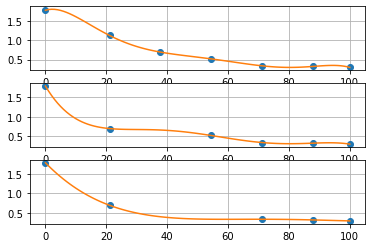

In [5]:
T=np.array([0,21.1,37.8,54.4,71.1,87.8,100]) #Temperatura
mu=np.array([1.79,1.13,0.696,.519,0.338,0.321,0.296]) #mu

Tb=np.linspace(0,100,101) #todos los valores enteros de la temperuta de 0 a 100 grados centigrados
#Valores iniciales para el polinomio de Lagrange
polinomio=0 
Ln=1
p=[]
#Inicio del calculo del polinomio
for k in range(len(Tb)): 
    for i in range(len(T)):
        for j in range(len(T)):
            if j!=i:
                Ln*=(Tb[k]-T[j])/(T[i]-T[j])
        polinomio+=Ln*mu[i]
        Ln=1
    p.append(polinomio)
    polinomio=0
print (p[11],p[31],p[61],p[91],"mu cuando la temperatura va 10,30,60,90 grados centigrados respectivamente") #Puntos pedidos

#se repite el procedimiento para hallar el polinomio de lagrange con un dato menos

T1=np.array([0,21.1,54.4,71.1,87.8,100]) #Temperatura menos un dato
mu1=np.array([1.79,0.696,0.519,0.338,0.321,0.296]) #mu menos un dato

Tb1=np.linspace(0,100,101)
polinomio1=0
Ln1=1
p1=[]

for k in range(len(Tb1)):
    for i in range(len(T1)):
        for j in range(len(T1)):
            if j!=i:
                Ln1*=(Tb1[k]-T1[j])/(T1[i]-T1[j])
        polinomio1+=Ln1*mu1[i]
        Ln1=1
    p1.append(polinomio1)
    polinomio1=0
#se repite el procedimiento para hallar el polinomio de lagrange con dos datos menos

T2=np.array([0,21.1,71.1,87.8,100]) # menos datos 
mu2=np.array([1.79,0.696,0.338,0.321,0.296]) #mu menos dos datos

Tb2=np.linspace(0,100,101)
polinomio2=0
Ln2=1
p2=[]

for k in range(len(Tb2)):
    for i in range(len(T2)):
        for j in range(len(T2)):
            if j!=i:
                Ln2*=(Tb2[k]-T2[j])/(T2[i]-T2[j])
        polinomio2+=Ln2*mu2[i]
        Ln2=1
    p2.append(polinomio2)
    polinomio2=0

#Se graficaran los puntos y polinomios

plt.subplot(3,1,1)
plt.plot(T,mu,"o") #temperatura vs mu dados
plt.plot(Tb,p) #polinomio de lagrange de los puntos dados
plt.grid()
plt.subplot(3,1,2)
plt.plot(T1,mu1,"o")#temperatura vs mu sin un dato
plt.plot(Tb1,p1) #polinomio de lagrange sin un punto 
plt.grid()
plt.subplot(3,1,3)
plt.plot(T2,mu2,"o")#temperatura vs mu sin dos datos
plt.plot(Tb2,p2)#polinomio de lagrange sin dos puntos
plt.grid()
plt.show()

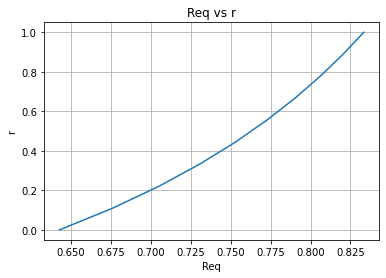

[0.83333333]


In [6]:
R=1 #valor conveniente para R
r=np.linspace(0,R,10) #los valores de r  
V=5 #valor de cualquiera de V
b=np.array([0,0,0,0,0,0,0,0,0,0,0,0,V]).reshape(13,1) #Vector de los resultados del sistema
Req=[] #resistencia equivalente
for i in range(10): #ciclo para el sistema de ecuaciones con r variando
	A=np.array([1,0,1,0,1,0,0,0,0,0,0,0,-1,-1,1,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,1,0,-1,0,0,0,0,0,0,0,0,0,-1,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,-1,-1,0,1,-R,0,0,0,R,0,0,R,R,0,0,0,0,0,R,0,0,0,-R,0,R,0,0,-R,0,0,0,0,0,-R,0,-R,R,0,0,-R,0,0,0,0,0,r[i],0,-R,0,-R,0,0,0,0,-R,0,-R,-R,r[i],-R,0,0,0,0,0,0,0,0,0,0,0,0,0,R,0,0,0,R,0,R,0,0]).reshape(13,13) #matriz asociada al sistema de ecuacion
	sol=np.linalg.solve(A,b) # solucion al sistema de ecuaciones AI_i=b para un r entre 0 y R con i de 1 a 13
	Req.append(V/sol[-1]) #Valor de la resistencia equivalente para un r entre 0 y R

#grafica para observar como varia R en funcion de r
plt.title("Req vs r")
plt.plot(Req,r)
plt.xlabel("Req")
plt.ylabel("r")
plt.grid()
plt.show()

print (Req[-1]) #se hizo para observar que cuando r=R la resistencia equivalente si da 5/6 de R

#se observa que Req aumenta cuando r aumenta,ademas esta relacion no es lineal

In [7]:
"""
E.D a resolver
dx/dt=-ay-ex+f(t)
dy/dt=-bx-ny+g(t)

dx/dt=-cxy-ex+f(t)
dy/dt=-bx-ny+g(t)

a=0.5b
e=2n

c=0.5b
"""

h=0.01 #incremento
#condiciones iniciales
x=[20000]
y=[10000]

X=[20000]
Y=[10000]

X1=[20000]
Y1=[10000]

t=[0]

#constantes
n=5
b=4
a=0.5*b
e=2*n
c=0.5*b


def f(t): #funcion de la cual depende dx/dt
    return t**2-9
def g(t): #funcion de la cual depende dy/dt
    return t+12
def dx(q,w,r): # se defginedx/dt
    return -a*q-e*w+f(r) #a lo que es igual dx/dt
def dy(q,w,r): #se define dy/dt
    return -b*q-n*w+g(r) #a lo que es igual dy/dt


def RK2(a,b,c):
    k0=a
    k1=b
    return (k1*h)+c
def RK41(z,s,d):
    k0=dx(z,s,d)
    k1=dx(d*(0.5*h),,d*(0.5*h))
    k2=c
    k3=d
    return a+(h/6)*(k0+2*k1+2*k2+k3)

for i in range(1,100):
    x.append(x[i-1]+h*dx(y[i-1],x[i-1],t[i-1]))
    y.append(y[i-1]+h*dy(x[i-1],y[i-1],t[i-1]))
    X.append(RK2(dx(Y[i-1],X[i-1],t[i-1]),x[i],X[i-1]))
    Y.append(RK2(dy(X[i-1],Y[i-1],t[i-1]),y[i],Y[i-1]))
    X1.append(RK4(dx(Y1[i-1],X1[i-1],t[i-1]),dx(dy(X1[i-1]+(h*0.5),Y1[i-1]+(h*0.5),t[i-1]+(h*0.5)),dy(Y1[i-1]+(h*0.5),X1[i-1]+(h*0.5),t[i-1]+(h*0.5),t[i-1]+(h*0.5)),))	
    t.append(t[i-1]+h)



plt.plot(t,x,label='x euler')
plt.plot(t,y,label='y euler')
plt.plot(t,X,label='x RK2')
plt.plot(t,Y,label='y RK2')
plt.legend()
plt.show()

SyntaxError: invalid syntax (3738810216.py, line 52)

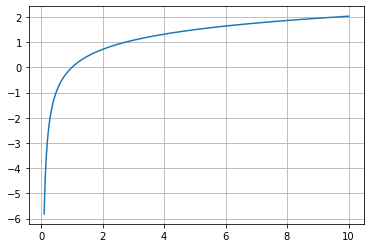

la grafica tiene raiz en ( 1.0 , 0.0 ) con  8 iteraciones


In [8]:
"""
t2/t1=f ------> 1/f)t1/t2
"""

def fun(f):#Se define la funcion a la cual queremos hallar sus raices
    return (0.7*np.log(f))+(((f-1)/f)*(1.4/3))


#Se grafica para aproximar las raices a vista
x=np.linspace(0.1,10,1000)

plt.plot(x,fun(x))
plt.grid()
plt.show()
"""
se acota la grafica para aproximar las raices y se observa que de 0.1 a 100 
la grafica tiene dos raices las cuales estan entre 1 y 3
"""
def dfun(f):#Se define la dervida de la funcion la cual hallaremos sus raices
    return (0.7/f)+((1.4)/(3*f**2))
pn1=1#Viendo la grafica se observa que cuando f=1--->t2=t1 se ecuentra una raiz,haciendo f=1 ln(1)=f y queda 1.2f-12 y esto es 0

"""
Se encontrara la segunda raiz que debe estar entre 3 y 3.5 
Por el metodo de newton
"""
tol=10**-10
pn2=2.25 #Valor aproximado de la raiz

if fun(pn2)<tol:
    print ("la grafica tiene raiz en (",pn2,",",fun(pn2),")","con 0 iteraciones")
else:
    for i in range(1,100):
        pn=pn2-(fun(pn2)/dfun(pn2))
        if abs(fun(pn))<tol:
            break
        pn2=pn

print ("la grafica tiene raiz en (",pn,",",fun(pn),")","con ",i,"iteraciones")


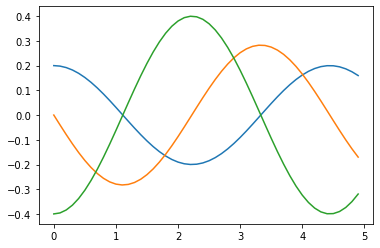

In [9]:
"""omega=raiz(k/m)   k es la contante de elasticidad de 0.1 n/m y m es la masa igual a 5 g
t=0 aumentara 0,1 durante 5 segundos

oscilador armonico
"""

A=0.2 
t0=0.0
tf=5.0
dt=0.1
omega=1.414
tiempo=[]
posicion=[]
velocidad=[]
aceleracion=[]

len_t=int((tf-t0)/dt) #por los parametros esto es 50

for i in range (len_t):
    posicion.append(A*cos(omega*i*dt)) #i*dt maximo sera 5
    tiempo.append(i*dt)
    velocidad.append((-1.0)*omega*A*sin(omega*i*dt))
    aceleracion.append((-1.0)*(omega**2)*A*cos(omega*i*dt))

#graficacion 
plt.plot(tiempo,posicion)
plt.plot(tiempo,velocidad)
plt.plot(tiempo,aceleracion)
plt.show()

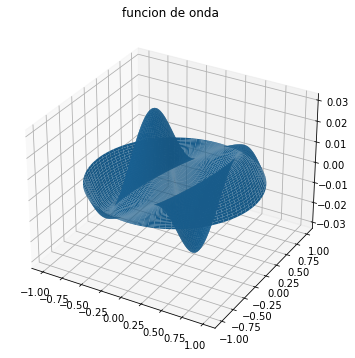

In [10]:
#condiciones velocidad,radio,n iguales a 1 y tiempo igual a 10
v=1
n=1
R=1
t=10

x12 = spl.jn_zeros(n,2)[-1] #segundo cero de la funcion de bessel de orden 1
rho = np.linspace(0,R,100) #rho que va de 0 al radio de la membrana en 100 particiones
phi = np.linspace(0,2*np.pi,100) #angulo phi que va de 0 a 2pi en 100 particiones

#se define las funciones a integrarse y el limite de la segunda variable
def Da1(x,y):
    Da1=np.cos(x)*y*spl.jn(1,(y*spl.jn_zeros(1,2)[-1]))
    return Da1
def Di1(y,x):
    Di1=np.sin(x)*y*spl.jn(1,(y*spl.jn_zeros(1,2)[-1]))
    return Di1
#se definen los limites de las segunda variable de la funcion a integrar
def inf(x):
    return 0
def sup(x):
    return 1

A=dblquad(Da1,0,2*np.pi,inf,sup) #se integra la parte real de las constantes
B=dblquad(Di1,0,2*np.pi,inf,sup) #se integra la parte compleja de las constantes

"""
D=A-1j*B y E=A+1j*B
K=De^iphi+Ee^-iphi, e^iphi=cos(phi)+isin(phi) y e^-iphi=cos(phi)-isin(phi)

De^iphi=Acos(phi)+iAsin(phi)-iBcos(phi)+Bsin(phi)
Ee^-iphi=Acos(phi)-iAsin(phi)+iBcos(phi)+Bsin(phi)

(De^iphi)+(Ee^-iphi)=2Acos(phi)+2Bsin(phi)
"""
#como las integrales son tuplas y el elemnto cero de estas es el valor de la integrar es lo que se manipulara
a=A[0] 
b=B[0]


#graficacion
rho,phi = np.meshgrid(rho,phi) #variable a graficar
Z = spl.jn(1,x12*rho/R)*2*(a*np.cos(phi)+b*np.sin(phi))*(np.cos(x12*t*v/R)) #funcion a graficar en funcion de las variables

#cambio de coordenadas de cilindriacas a cartesianas
X = rho*np.cos(phi) 
Y = rho*np.sin(phi)

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')
h = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0)
ax.set_title("funcion de onda")
plt.show()


In [11]:
"""
se mirara las racices de la funcion x^2+62.10x+1=0
X1=-0.01610723 y X2=-62.08390
se hara comparando con su raiz real y aproximando los valores a flotantes 16 y por dos metodos "diferentes"
"""

a=np.float16(1)
b=np.float16(62.10)
c=np.float16(1)
dos=np.float16(2)
cuatro=np.float16(4)
X1=-0.01610723 #primera raiz
X2=-62.08390 #segunda raiz

X1a=(-b+np.sqrt((b**dos)-cuatro*a*c))/(dos*a)#formula uno para la primer raiz
X2a=(-b-np.sqrt((b**dos)-cuatro*a*c))/(dos*a)#formula uno para la segunda raiz

X1b=(-dos*c)/(b+np.sqrt((b**dos)-cuatro*a*c))#formula dos para la primer raiz
X2b=(-dos*c)/(b-np.sqrt((b**dos)-cuatro*a*c))#formula dos para la segunda raiz

print ("la primer raiz x^2+62.10x+1=0 es x=",X1a)
print ("la segunda raiz de x^2+62.10x+1=0 esx= ",X2a)
print ("la primer raiz x^2+62.10x+1=0 es x=",X1b)
print ("la segunda raiz de x^2+62.10x+1=0 es x=",X2b)

cero1=((X1a**dos)+(b*X1a)+c)
cero2=((X2a**dos)+(b*X2a)+c)
cero3=((X1b**dos)+(b*X1b)+c)
cero4=((X2b**dos)+(b*X2b)+c)

print ("la funcion evaluada en las raices por la formula general es:",cero1,"y",cero2)
print ("la funcion evaluada en las raies es:",cero3,"y",cero4)

error1=abs((X1a-X1)/X1)
error2=abs((X2a-X2)/X2)
error3=abs((X1b-X1)/X1)
error4=abs((X2b-X2)/X2)

print ("el error de a: ",error1)
print ("el error de b: ",error2)
print ("el error de c: ",error3)
print ("el error de d: ",error4)


la primer raiz x^2+62.10x+1=0 es x= -0.01563
la segunda raiz de x^2+62.10x+1=0 esx=  -62.06
la primer raiz x^2+62.10x+1=0 es x= -0.01611
la segunda raiz de x^2+62.10x+1=0 es x= -64.0
la funcion evaluada en las raices por la formula general es: 0.03027 y -1.0
la funcion evaluada en las raies es: -0.000977 y 123.0
el error de a:  0.029938729378049495
el error de b:  0.00034469484036924006
el error de c:  0.00037568532888645914
el error de d:  0.030863074001472205


In [12]:
"""
hallar el cero para (Q^2/2gb^2h0^2)+h0=H+h+(Q^2/2gb^2h^2)
con
Q=1.2 m^3/s
g=9.81 m/s^2
h=1.8m
h0=0.6m
H=0.075m
h=
f(h)=0 ----> (Q^2/2gb^2h0^2)+h0-H-h-(Q^2/2gb^2h^2)=0=(Q^2(h^2-h0^2)/2gb^2h^2)+h0-h-H
"""

a = 0.2
b = 0.6  
c = 0.45
d = 0.50

n = (np.log10(b-a)-(-10))/np.log10(2) #Tomamos el número máximo de iteraciones por medio del teorema 2.1 Del libro Analisis númerico de Burden
k = int(n) #Sacamos el número entero de las iteraciones 
tol = 10**(-10) #Tolerancia
Q = 1.2
g = 9.81
b_0 = 1.8
h_0 = 0.6
H = 0.075
x = np.linspace(0.2,h_0,100)

def f(h): #Definimos la función a la cual le deseamos sacar la o las raices
    return (Q**2)/(2*g*(b_0**2)*(h**2)) + h + H - (Q**2)/(2*g*(b_0**2)*(h_0**2)) - h_0

"""
se creo esta grafica para aproximar donde estan los cero de la funcion

plt.xlabel("h")
plt.ylabel("f(h)")
plt.plot(x,f(x))
plt.grid()
plt.show()
"""
#Iniciamos con el metodo e biseccion
for i in range(k+1):
    pm = (a+b)*0.5
    if np.sign(f(a))*np.sign(f(pm))<0:
        b = pm
    else:
        a =pm
    if np.abs(f(pm))<tol: 
        break
    pm2 = (c+d)*0.5
    if np.sign(f(c))*np.sign(f(pm2))<0:
        d = pm2
    else:
        c =pm2
    if np.abs(f(pm2))<tol: 
        break

print("La funcion tiene raices en (",pm,",",f(pm),") y",pm2,",",f(pm2),")")

La funcion tiene raices en ( 0.2647554397583008 , -2.5419290883288426e-07 ) y 0.4957551240921021 , -9.2988172717412e-11 )


In [13]:
"""
hallar el cero para (Q^2/2gb^2h0^2)+h0=H+h+(Q^2/2gb^2h^2)
con
Q=1.2 m^3/s
g=9.81 m/s^2
h=1.8m
h0=0.6m
H=0.075m
h=
f(h)=0 ----> (Q^2/2gb^2h0^2)+h0-H-h-(Q^2/2gb^2h^2)=0=(Q^2(h^2-h0^2)/2gb^2h^2)+h0-h-H
"""

p = 2
p2 =0.2
n = 100
tol = 10**(-4)
Q = 1.2
g = 9.81
b = 1.8
h_0 = 0.6
H = 0.075
x = np.linspace(0.2,h_0,100)

def f(h):#Definimos la funcion a la cual le deseamos sacar la o las raices
    return (Q**2)/(2*g*(b**2)*(h**2)) + h + H - (Q**2)/(2*g*(b**2)*(h_0**2)) -h_0
def df(h):#Definimos la derivada de la funcion a la cual le deseamos sacar la o las raices
    return -(Q**2)/(g*(b**2)*(h**3)) + 1

"""
se creo esta grafica para aproximar donde estan los cero de la funcion

plt.xlabel("h")
plt.ylabel("F(h)")
plt.plot(x,f(x))
plt.grid()
plt.show()
"""

for i in range(n): #se aplica el metodo de Newton
    pm = p - (f(p))/(df(p))
    if np.abs(f(p))<tol:
        break
    p = pm
    
    pm2 = p2 - (f(p2))/(df(p2))
    if np.abs(f(p2))<tol:
        break
    p2 = pm2

print("La funcion tiene raices en (",pm,",",f(pm),") y",pm2,",",f(pm2),")")

La funcion tiene raices en ( 0.49575513167982865 , 4.673378239949955e-09 ) y 0.26448040377675125 , 0.00039719150966399663 )


Se hallaran los ceros a la funcion 
$$S(t)=S_0-\frac{mg}{k}t+\frac{m^{2}g}{k^{2}}(1-e^{-kt/m})$$
$$g=32,17$$
$$S_o=300$$
$$k=0,1$$
$$m=0,25$$
como hay que hallar las raices queda
$$0=S_0-\frac{mg}{k}t+\frac{m^{2}g}{k^{2}}(1-e^{-kt/m})$$
$$\frac{mg}{k}t=S_0+\frac{m^{2}g}{k^{2}}(1-e^{-kt/m})$$
$$t=\frac{kS_0}{mg}+\frac{m}{k}(1-e^{-kt/m})=f(t)$$
$$\frac{df}{dt}=e^{-kt/m}$$

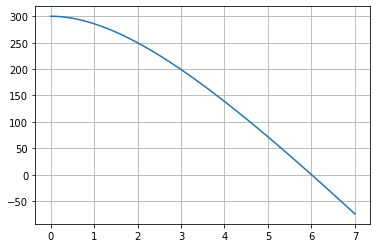

6.003726308757253


In [14]:
#definimos las constantes
g=32.17
so=300
k=0.1
m=0.25
tol=10**-10
def fun(t): #definimos la funcion a la cual le encontraremos los ceros
    return so-(m*g*t/k)+(((m**2)*g/(k**2))*(1-np.exp(-k*t/m)))

#se graficara la funcion para ver su cero
x=np.linspace(0,7,1000)
plt.plot(x,fun(x))
plt.grid()
plt.show()

# Se iniciara a hallar las raices

def f(t):
    return (so*k/(m*g))+((m/k)*(1-np.exp(-k*t/m)))
def df(t):
    return np.exp(-k*t/m)

po=6
for i in range(100):
    p=f(po)
    if abs(p-po)<=tol:
        break
    po=p
print (p)

# Gas

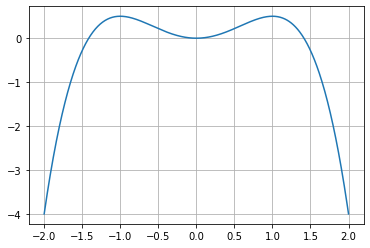

los ceros estan cuando el factor de lorentz es -1.4142135623842478 y 1.4142135623842478
el cero en -1.4142135623842478 no es posible ya que el factor de lorentz es mayor que cero


In [15]:
a=0.5
def fun(r):#defino la funcion a la cual le encontrare los ceros
    return ((a-1)*(r**4))+r**2

x=np.linspace(-2,2,1000)#factor de lorentz
plt.grid()
plt.plot(x,fun(x))#grafico la funcion
plt.show()#muestro la funcion

#defino lo necesario para hallar los ceros por biseccion
a1=-1.5
b1=-1
a2=1
b2=1.5
tol = 10**(-10) #Tolerancia
n = (np.log10(b1-a1)-(-10))/np.log10(2) #Tomamos el número máximo de iteraciones por medio del teorema 2.1 Del libro Analisis númerico de Burden
k = int(n) #Sacamos el número entero de las iteraciones 
#aplico el metodo de biseccion
for i in range(k+1):
    pm1 = (a1+b1)*0.5
    if np.sign(fun(a1))*np.sign(fun(pm1))<0:
        b1 = pm1
    else:
        a1 =pm1
    if np.abs(fun(pm1))<tol: 
        break

for i in range(k+1):
    pm2 = (a2+b2)*0.5
    if np.sign(fun(a2))*np.sign(fun(pm2))<0:
        b2 = pm2
    else:
        a2 =pm2
    if np.abs(fun(pm2))<tol: 
        break



print ("los ceros estan cuando el factor de lorentz es",pm1,"y",pm2)

print ("el cero en",pm1,"no es posible ya que el factor de lorentz es mayor que cero")

$$r=\frac{1}{\sqrt{1-\frac{v^{2}}{c^{2}}}}$$

$$r^{2}=\frac{1}{1-\frac{v^{2}}{c^{2}}}$$

$$r=pm_2$$

$$pm_2^{2}-pm_2^{2}\frac{v^{2}}{c^{2}}=1$$

$$pm_2^{2}-1=pm_2^{2}\frac{v^{2}}{c^{2}}$$

$$1-\frac{1}{pm_2^{2}}=\frac{v^{2}}{c^{2}}$$

con c=1 en unidades luz

$$\sqrt{1-\frac{1}{pm_2^{2}}}=v$$

In [16]:
v=np.sqrt(1-pm2**-2)
print ("la velocidad del gas es:",v)
print (("Observar que la velocidad del gas es del 70% de la velocidad de la luz en el vacio"))

la velocidad del gas es: 0.7071067811921239
Observar que la velocidad del gas es del 70% de la velocidad de la luz en el vacio


In [17]:
def dfun(r):#defino la derivada de la funcion a la cual le encontrare los ceros
    return (4*(a-1)*(r**3))+2*r
pm=1.4

for i in range (100):
    pmi=pm-(fun(pm)/dfun(pm))
    if fun(pmi)<tol:
        break
    pm=pmi
print (pmi)

1.4145833333333333


In [18]:
h=10**-10
x0=1.4
x1=x0+h

for i in range (100):
    x2=x1-((fun(x1)*(x1-x0))/(fun(x1)-fun(x0)))
    if fun(x2)<tol:
        break
    x0=x1
    x1=x2
    
print (x2)

1.414583341525087


In [19]:
pi=1.3
pf=1.5
for i in range(100):
    p=(pi*fun(pf)-pf*fun(pi))/(fun(pf)-fun(pi))
    if abs(p-pf)<=tol:
        break
    if np.sign(fun(p))*np.sign(fun(p))<0:
        pi=pf
        pf=p
print (p)

1.3964469808541973


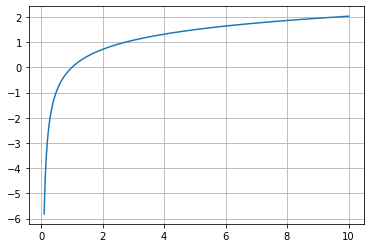

la grafica tiene raiz en ( 1.0 , 0.0 ) con  8 iteraciones


In [20]:
"""
t2/t1=f ------> 1/f)t1/t2
"""

def fun(f):#Se define la funcion a la cual queremos hallar sus raices
    return (0.7*np.log(f))+(((f-1)/f)*(1.4/3))


#Se grafica para aproximar las raices a vista
x=np.linspace(0.1,10,1000)

plt.plot(x,fun(x))
plt.grid()
plt.show()
"""
se acota la grafica para aproximar las raices y se observa que de 0.1 a 100 
la grafica tiene dos raices las cuales estan entre 1 y 3
"""
def dfun(f):#Se define la dervida de la funcion la cual hallaremos sus raices
    return (0.7/f)+((1.4)/(3*f**2))
pn1=1#Viendo la grafica se observa que cuando f=1--->t2=t1 se ecuentra una raiz,haciendo f=1 ln(1)=f y queda 1.2f-12 y esto es 0

"""
Se encontrara la segunda raiz que debe estar entre 3 y 3.5 
Por el metodo de newton
"""
tol=10**-10
pn2=2.25 #Valor aproximado de la raiz

if fun(pn2)<tol:
    print ("la grafica tiene raiz en (",pn2,",",fun(pn2),")","con 0 iteraciones")
else:
    for i in range(1,100):
        pn=pn2-(fun(pn2)/dfun(pn2))
        if abs(fun(pn))<tol:
            break
        pn2=pn

print ("la grafica tiene raiz en (",pn,",",fun(pn),")","con ",i,"iteraciones")

In [21]:
#constantes
Ho=2.106*10**-12
ap=12#limite superior de la integral
wm=0.3089
wr=9.23640*10**-5
wl=0.6911
wo=1

a=np.linspace(0.1,ap,1000) 

h=a[1]-a[0]
#metodos y funcion
def trapecio(x0,x1):
    return (h/2)*(x0+x1) 
def simpson(x0,x1,x2):
    return (h/3)*(x0+4*x1+x2)
def f(x):
    return np.sqrt(1/((1-wo)+wm*(1/x)+wr*(1/(x**2))+wl*(x**2)))


#integrales
suma1=0
suma2=0

for i in range(len(a)-1):
    suma1+=trapecio(f(a[i]),f(a[i+1]))	
for i in range(0,len(a)-2,2):
    suma2+=simpson(f(a[i]),f(a[i+1]),f(a[i+2]))	

t1=suma1/Ho
t2=suma2/Ho

print (t1,t2)

1818456305501.8499 1817905018245.5085


Las técnicas de Monte Carlo están basadas en el teorema del valor medio.
\\
Se tiene una función f(x) la cual se quiere integrar en un intervalo [a,b] ,ósea $\int_{a}^{b} f(x) dx=(b-a)G$.
  
Donde  $G\simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i)$ 

Donde $a \leq x_i \leq b $

Donde es una secuencia de N números aleatorios en el intervalo.

El error de la integral por el método de Montecarlo está dada por: $\sigma_I=\frac{\sigma_f}{\sqrt{N}}$

Donde $\sigma_f$  es la desviación esta estándar de la integral de la función f(x)

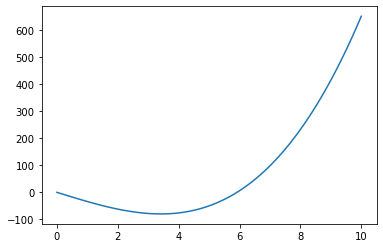

simpson: 750.0000000000002 
 montecarlo: -44.87523897404384 
 montecarlo: 748.4018464172107 
 montecarlo: 750.6161976043212 
 libreria: 750.0000000000002


In [22]:
def f(x): #se define la funcion a integrar
    return x**3-35*x

x=np.linspace(0,10,101) #limites de integracion con 100 particiones entre ellos

def simpson(x0,x1,x2):#se define el metodo de simpson con el que compararemos las integrales
    return (h/3)*(x0+4*x1+x2)

suma=0
h=x[1]-x[0]
for i in range(0,len(x)-1,2): #se usa el metodo de simpson compuesto para aproximar la integral
    suma+=simpson(f(x[i]),f(x[i+1]),f(x[i+2]))
    
#se inicia los valores para empezar con el metodo de montecarlo
a=x[0]
b=x[-1]
resta=b-a
N1=10
N2=10**6
N3=10**7
sumat1=0
z1=[]
sumat2=0
z2=[]
sumat3=0
z3=[]
#inicio de la sumatoria G
for i in range(N1):
    z1.append(b*np.random.random())
    sumat1+=f(z1[i])
for i in range(N3):
    z3.append(b*np.random.random())
    sumat3+=f(z3[i])
for i in range(N2):
    z2.append(b*np.random.random())
    sumat2+=f(z2[i])  
#con los valores obtenidos se aplica la aproxima del metodo
monte1=resta*sumat1*(1/N1)
monte2=resta*sumat2*(1/N2)
monte3=resta*sumat3*(1/N3)

integral=spli.quad(f,x[0],x[-1])#integral usando librerias,es una tupla donde el primer valor da el resultado de la integral y el segundo es el error de esta
#se grafica la funcion
plt.plot(x,f(x))
plt.show()

print ("simpson:",suma,"\n","montecarlo:",monte1,"\n","montecarlo:",monte2,"\n","montecarlo:",monte3,"\n","libreria:",integral[0])
#se mostrara los valores de la integral dados por simpson compuesta,metodo de montecarlos y la libreria scipy

$\ddot r=r\dot\theta^{2}- \frac{GM_e}{r^{2}}$ y $\ddot \theta=\frac{-2 \dot r \dot\theta}{r}$;

donde $r^{2}=x^{2}+y^{2}$ y $\theta=tan^{-1}(\frac{y}{x})$

Trabajando en el sistema polar se tiene

$\ddot r=\frac{d\dot r}{dt}=r\dot\theta^{2}- \frac{GM_e}{r^{2}}$ y $\ddot \theta=\frac{d\dot \theta}{dt}=\frac{-2 \dot r \dot\theta}{r}$;

$v=\dot r$ y $\omega=\dot \theta=\frac{v_T}{R}$

El sistema queda:
$\frac{dv}{dt}=r\omega^{2}- \frac{GM_e}{r^{2}}$

$\frac{dr}{dt}=v$

$\frac{d\omega}{dt}=\frac{-2 v \omega}{r}$

$\frac{d\theta}{dt}=\omega=\frac{v_T}{R}$

Queda a resolver el sistema  con las 4 E.D.O 

Las condiciones iniciales son:

t=0 v=$v_o$=6700$\frac{m}{s}$,r=Re+H=(772+5.9742)Km, $\omega=\frac{v_o}{R},\theta=0$

In [23]:
#Definimos nuestras 4 ecuaciones diferenciales, ambas dependientes de r(radio),v(Velocidad inicial),w(velocidad angular),00(ángulo)

def dv(r,v,w,O0):
    G = 6.672*10**(-20) #Km**3/Kg*s
    M = 5.9742*10**24 #Kg
    return (r*w**2)-((G*M)/(r**2))
def dr(r,v,w,O0):
    return v 
def dw(r,v,w,O0):
    return(-2*v*w)/r
def dteta(r,v,w,O0):
    return w
# Condiciones iniciales
w0 = 0.00937 #1/s
v0 = 6.7 #Km/s
r0 = 7150.14 #Km 
rf = 6378.14 #km
O0 = 0 #Teta cero
n = 10000 #Número de iteraciones
h = (r0-rf)/n # Pasos para que el r sea igual al radio de la tierra y llegue al suelo

#Listas que se irán llenando con los procedimientos del RK4
w = [w0] 
v = [v0]
O = [O0]
r = [r0]

#Dado que nuestro rf<r0, hacemos una modificación de tal manera de que el h recorra en sentido contrario,
#Osea, se resta dicho h 

for i in range(n):
    #Se aplica RK4 para la solución simultanea de las 4 EDO
    k1 = dr(r0,v0,w0,O0)
    l1 = dv(r0,v0,w0,O0)
    h1 = dw(r0,v0,w0,O0)
    g1 = dteta(r0,O0,w0,v0)
    k2 = dr(r0-0.5*h,v0+(h*0.5*l1),w0+(0.5*h*h1),O0+(0.5*h*g1))
    l2 = dv(r0-0.5*h,v0+(h*0.5*l1),w0+(0.5*h*h1),O0+(0.5*h*g1))
    h2 = dw(r0-0.5*h,v0+(h*0.5*l1),w0+(0.5*h*h1),O0+(0.5*h*g1))
    g2 = dteta(r0-0.5*h,v0+(h*0.5*l1),w0+(0.5*h*h1),O0+(0.5*h*g1))
    k3 = dr(r0-0.5*h,v0+(h*0.5*l2),w0+(0.5*h*h2),O0+(0.5*h*g2))
    l3 = dv(r0-0.5*h,v0+(h*0.5*l2),w0+(0.5*h*h2),O0+(0.5*h*g2))
    h3 = dw(r0-0.5*h,v0+(h*0.5*l2),w0+(0.5*h*h2),O0+(0.5*h*g2))
    g3 = dteta(r0-0.5*h,v0+(h*0.5*l2),w0+(0.5*h*h2),O0+(0.5*h*g2))
    k4 = dr(r0-h,v0+(k3*h),w0+(h*l3),O0+(g3*h))
    l4 = dv(r0-h,v0+(k3*h),w0+(h*l3),O0+(g3*h))
    h4 = dw(r0-h,v0+(k3*h),w0+(h*l3),O0+(g3*h))
    g4 = dteta(r0-h,v0+(k3*h),w0+(h*l3),O0+(g3*h))
    #Se obtinen los respectivos valores y se proceden a guardarlos en las listas
    v0 = v0+(l1+2*l2+2*l3+l4)/6
    w0 = w0+(h1+2*h2+2*h3+h4)/6
    O0 = O0+(g1+2*g2+2*g3+g4)/6
    v0 = v0
    w0 = w0
    O0 = O0
    r0 = r0 - h 
    v.append(v0) # Se llena los valores de la velocida
    w.append(w0) # Se llena los valores de la velocida angular 
    O.append(O0) # Se llena los valores del ángulo
    r.append(r0) # Se llena los valores del radio, de tal manera de que el radio final sea igual al radio de la tierra
print("El ángulo final es de:",O[-1]) #ángulo obtenido

El ángulo final es de: 0.6419428737652112


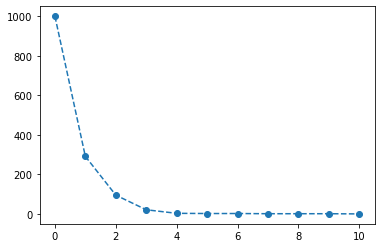

In [25]:
nucleo=np.zeros(1000) #numero de nucleos
la=0.30 # p
nucleos=len(nucleo)
t=[0] #Tiempo
n=[nucleos] #nucleos en el tiempo
while nucleos != 0:
    t.append(t[-1]+1)
    for i in range(len(nucleo)):
        if nucleo[i]==1 or np.random.random()<la:
            nucleo[i]=nucleo[i]
        else :
            nucleo[i]=1
            nucleos-=1
    n.append(nucleos)
plt.plot(t,n,"--o")
plt.show()